In [1]:
import numpy as np
import pandas as pd
import os
import h5py
from sklearn import metrics
from matplotlib import pyplot as plt

In [2]:
pat_id = 17;
y_prob = np.load('/disk/raptor/lclhome/umohamma/eeg_experiments/chb_mit_exps/preds_exps/output_paper/output_pap_chb17.npy')
y_true = pd.read_csv('/disk/raptor-2/umohamma/research_data/eeg_chb_mit/pap/tst/mit_eeg_scaled_srate256hz_wlen4s_patid17_allrecs_tst_labs.csv',header=None).values

In [3]:
y_prob

array([[2.3216361e-04],
       [1.0191484e-03],
       [1.1043222e-04],
       ...,
       [2.0270323e-04],
       [2.5323695e-06],
       [2.2216460e-05]], dtype=float32)

In [4]:
metrics.roc_auc_score(y_true,y_prob)

0.9998407389711738

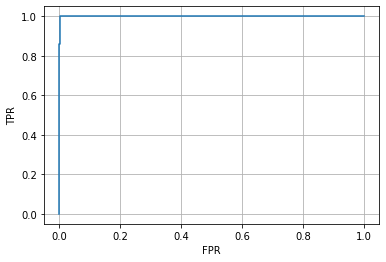

Threshold 0.95529014
Accuracy: 99.89%


,0,1
0,1792,2
1,0,7


In [5]:
fpr, tpr, thr = metrics.roc_curve(y_true,y_prob)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()
threshold = thr[4]
print('Threshold', threshold)
y_pred = y_prob >= threshold
print('Accuracy: {:.2f}%'.format(100*sum(sum(y_true == y_pred))/len(y_true)))
pd.DataFrame(metrics.confusion_matrix(y_true,y_pred))

In [6]:
df_tpr = pd.DataFrame(tpr)
df_fpr = pd.DataFrame(fpr)
with open('./results/tpr_chb{:02d}.txt'.format(pat_id), 'w') as f:
    dfAsString = df_tpr.to_string(header=False, index=False)
    f.write(dfAsString)
with open('./results/fpr_chb{:02d}.txt'.format(pat_id), 'w') as f:
    dfAsString = df_fpr.to_string(header=False, index=False)
    f.write(dfAsString)

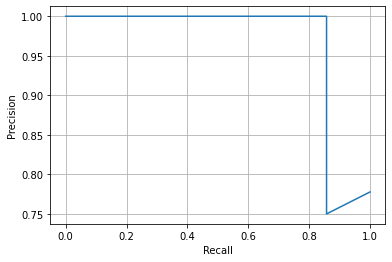

Threshold 0.95529014
Accuracy: 99.89%


,0,1
0,1792,2
1,0,7


In [7]:
pre, rec, thr = metrics.precision_recall_curve(y_true, y_prob)
plt.plot(rec,pre)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()
threshold = thr[0]
print('Threshold', threshold)
y_pred = y_prob >= threshold
print('Accuracy: {:.2f}%'.format(100*sum(sum(y_true == y_pred))/len(y_true)))
pd.DataFrame(metrics.confusion_matrix(y_true,y_pred))

In [8]:
df_pre = pd.DataFrame(pre)
df_rec = pd.DataFrame(rec)
with open('./results/pre_chb{:02d}.txt'.format(pat_id), 'w') as f:
    dfAsString = df_pre.to_string(header=False, index=False)
    f.write(dfAsString)
with open('./results/rec_chb{:02d}.txt'.format(pat_id), 'w') as f:
    dfAsString = df_rec.to_string(header=False, index=False)
    f.write(dfAsString)

In [9]:
confusion_matrix = metrics.confusion_matrix(y_true,y_pred)
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('CM:\n', confusion_matrix)
print('FP {} \nFN {} \nTP {} \nTN {} \n'.format(FP, FN, TP, TN))
print('FPR {} \nFNR {} \nTPR {} \nTNR {} \n'.format(FPR, FNR, TPR, TNR))

CM:
 [[1792    2]
 [   0    7]]
FP [0 2] 
FN [2 0] 
TP [1792    7] 
TN [   7 1792] 

FPR [0.         0.00111483] 
FNR [0.00111483 0.        ] 
TPR [0.99888517 1.        ] 
TNR [1.         0.99888517] 



In [10]:
df_cmx = pd.DataFrame(confusion_matrix )
with open('./results/cmx_chb{:02d}.txt'.format(pat_id), 'w') as f:
    dfAsString = df_cmx.to_string(header=False, index=False)
    f.write(dfAsString)